In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

from fbprophet import Prophet

In [71]:
# 시간별 평균이 이미 대치되어있는 testset불러오기
df = pd.read_csv("data/Test_요일별시간별평균대치.csv", sep=',')

In [92]:
original = pd.read_csv("data/test.csv", sep=',')

In [73]:
df['Time'] = pd.to_datetime(df.Time)
df = df.set_index('Time')

In [94]:
original['Time'] = pd.to_datetime(original.Time)
original = original.set_index('Time')

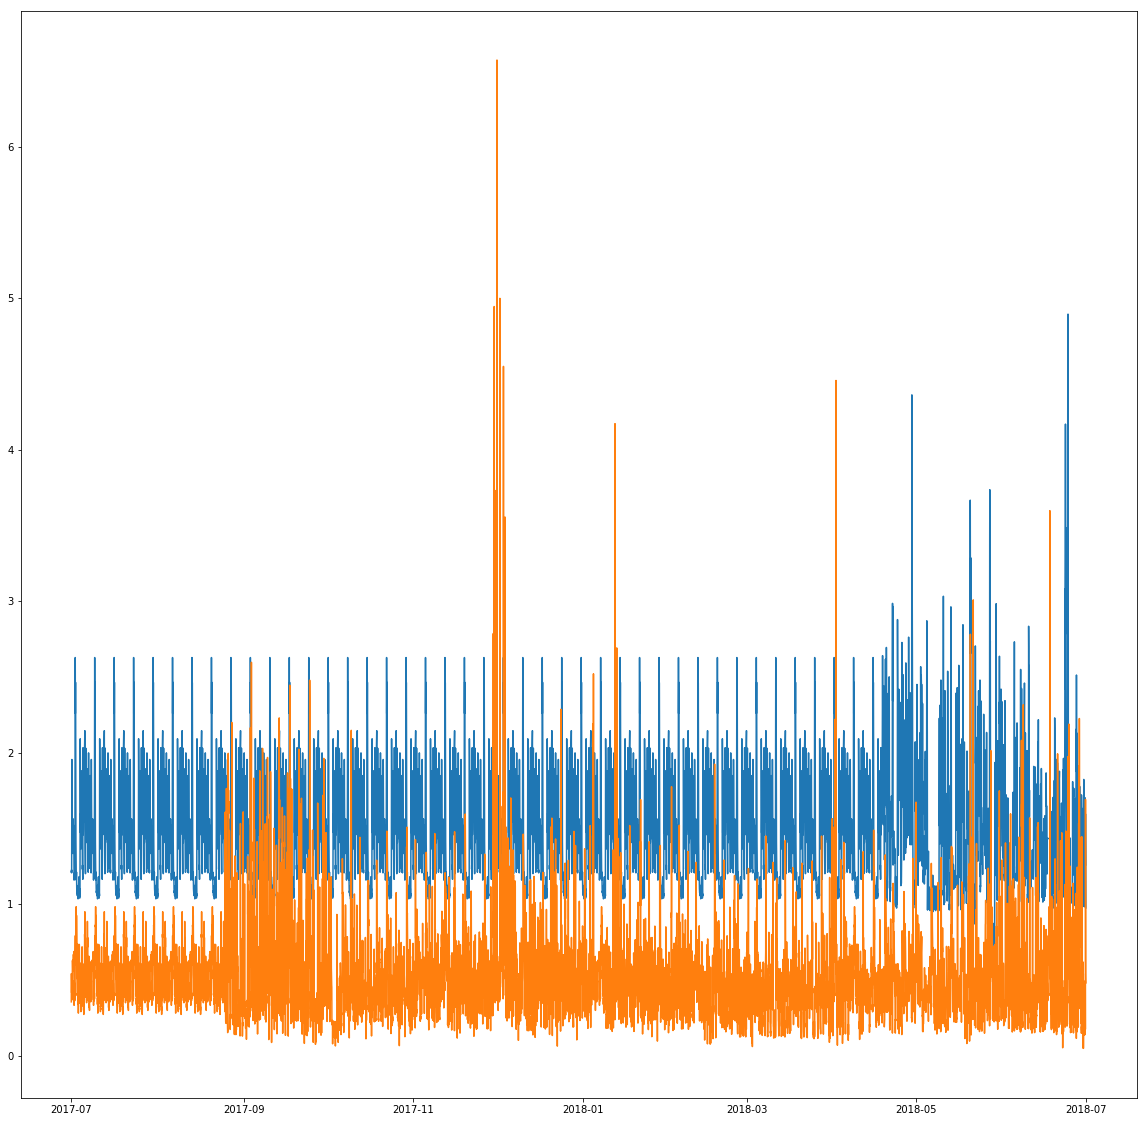

In [78]:
df_ = df.iloc[:,0:2]
plt.figure(figsize = (20,20))
plt.plot(df_.index, df_.values)
plt.show()

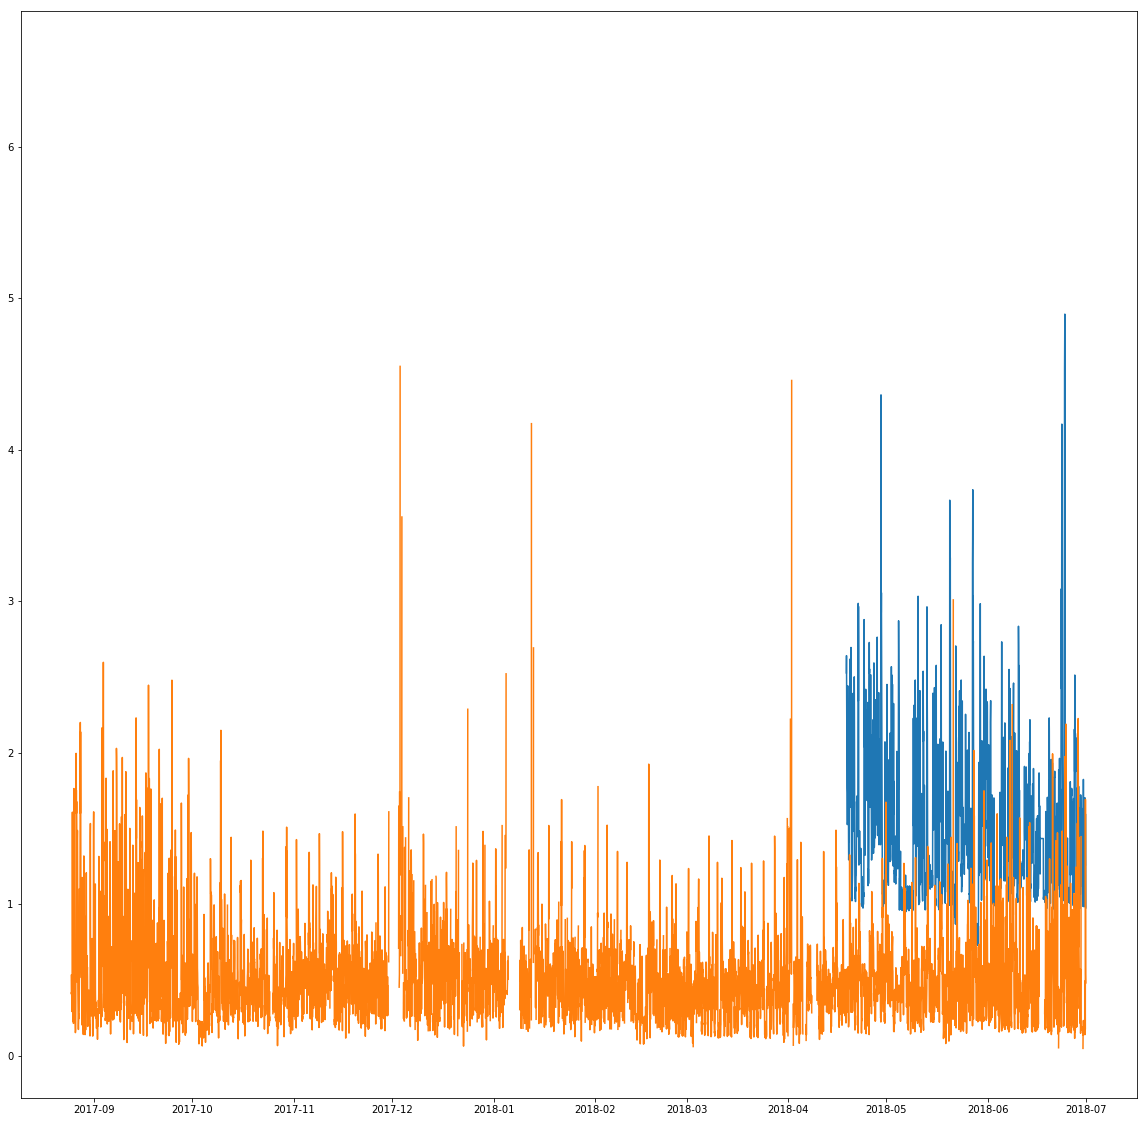

In [96]:
original_ = original.iloc[:,0:2]
plt.figure(figsize = (20,20))
plt.plot(original_.index, original_.values)
plt.show()

In [113]:
df2 = df
df2.head()

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X223,X266,X20,X443,X347,X75,X107,X230,month,date
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,1.212818,0.356179,0.243487,0.279395,0.184263,0.140487,0.274421,0.245513,0.054895,0.150158,...,0.425051,0.373947,0.149364,0.206000,0.147132,0.275,0.021,0.345447,7,1
2017-07-01 01:00:00,1.212455,0.542317,0.251675,0.338415,0.194659,0.165643,0.375659,0.281143,0.072000,0.207707,...,0.337250,0.339000,0.149455,0.247512,0.179390,0.222,0.021,0.347282,7,1
2017-07-01 02:00:00,1.227182,0.463524,0.268833,0.326167,0.192381,0.149628,0.344902,0.282214,0.068317,0.225756,...,0.307214,0.270122,0.149364,0.245238,0.159488,0.237,0.021,0.333050,7,1
2017-07-01 03:00:00,1.207273,0.416048,0.258095,0.317268,0.190463,0.144488,0.346854,0.310395,0.068073,0.210049,...,0.266381,0.214220,0.142182,0.236195,0.149317,0.229,0.020,0.312878,7,1
2017-07-01 04:00:00,1.472545,0.484977,0.314405,0.330262,0.189690,0.144488,0.327548,0.284419,0.072143,0.219071,...,0.279024,0.248537,0.135727,0.230333,0.142286,0.202,0.021,0.318488,7,1


In [114]:
time = []; place_id = []; target = []

for i in df2.columns:
    for j in range(len(df2)):
        place_id.append(i)
        time.append(df2.index[j])
        target.append(df2[i].iloc[j])
new_df = pd.DataFrame({'place_id': place_id, 'time':time, 'target': target})
new_df = new_df.dropna()
new_df = new_df.set_index('time')
new_df.head()

,place_id,target
time,,
2017-07-01 00:00:00,X26,1.212818
2017-07-01 01:00:00,X26,1.212455
2017-07-01 02:00:00,X26,1.227182
2017-07-01 03:00:00,X26,1.207273
2017-07-01 04:00:00,X26,1.472545


In [148]:
n=9
n=1
n

1

In [123]:
key = 'X26'
temp = new_df.loc[new_df['place_id']==key] # new_df에서 key와 일치하는 place_id를 가지는 부분을 temp에 할당
temp_1h = pd.DataFrame(list(zip(temp.index, temp.target)),
                   columns = ['ds', 'y'])
temp_d = temp.resample('D').sum()
temp_day = pd.DataFrame(list(zip(temp_d.index, temp_d.target)),
                   columns = ['ds', 'y'])

m = Prophet()
m.fit(temp_1h)
future = m.make_future_dataframe(periods=24, freq='H')
forecast = m.predict(future) 
fcst = forecast

In [ ]:
# agg라는 dictionary를 생성하여, 각 미터ID를 key로, 예측시간 및 값 리스트를 value로 저장
agg={}

for key in new_df['place_id'].unique(): # 미터ID리스트를 unique()함수로 추출, for loop
    temp = new_df.loc[new_df['place_id']==key] # new_df에서 key와 일치하는 place_id를 가지는 부분을 temp에 할당
    temp = 
    
    temp_1h=temp.resample('1h').sum() # 1시간 단위 resampling(일종의 timeseries압축)
    temp_1day=temp.resample('D').sum() # 1일 단위 resampling

    # 1 시간별 예측
    model = ARIMA(temp_1h['target'],  # target 을 추측하고자 함
                  order=get_optimal_params(temp_1h['target'])) # AIC를 최소화하는 최적의 파라미터 
    results_ARIMA = model.fit(disp=-1)  
    fcst = results_ARIMA.forecast(24) # 24시간 예측

    a = pd.DataFrame() # a: 예측값을 담을 데이터프레임 생성
    
    for i in range(24):
        a['X2018_7_1_'+str(i+1)+'h']=[fcst[0][i]] # column명 지정 및 예측값 대입

        
    # 1 일별 예측
    model = ARIMA(temp_1day['target'], 
                  order=get_optimal_params(temp_1day['target'])) 
    results_ARIMA = model.fit(disp=-1)
    fcst = results_ARIMA.forecast(10) # 10일을 예측

    for i in range(10):
        a['X2018_7_'+str(i+1)+'_d']=[fcst[0][i]] # column명 지정 및 예측값 대입
    
    
    # 월별 예측
    # 일별 예측의 sum 사용
    fcst = results_ARIMA.forecast(153)
    
    # column명을 지정 및 예측값 대입
    a['X2018_7_m'] = [np.sum(fcst[0][:31])] # 7월 
    a['X2018_8_m'] = [np.sum(fcst[0][31:62])] # 8월
    a['X2018_9_m'] = [np.sum(fcst[0][62:92])] # 9월
    a['X2018_10_m'] = [np.sum(fcst[0][92:123])] # 10월
    a['X2018_11_m'] = [np.sum(fcst[0][123:153])] # 11월
    
    # a 에 meter_id를 현재 예측하고 있는 열의 id(key)로 대입
    a['meter_id'] = key 
    
    # agg{ 미터ID: 시간별(subimssion.columns는 예측시간칼럼들) a의 예측값}
    agg[key] = a[submission.columns.tolist()]
    print(key)
print('---- Modeling Done ----')

In [129]:
original

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
Time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
2017-07-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2017-07-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
2017-07-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
2017-07-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN
2017-07-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251,0.021,NaN
2017-07-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.239,0.021,NaN
2017-07-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207,0.020,NaN
2017-07-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176,0.021,NaN
